# 多重スリットにおける回折・干渉実験の光の強度分布

### 必要なライブラリのインポート

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 各種設定（単位：mm）

In [2]:
# スリットースクリーン間距離
L = 1.0*10**3
# 光の波長
lam = 4.0*10**(-4)
# 波数
k = (2*np.pi)/lam
# スリット数(奇数限定)
N = 5
n = (N-1)*0.5
# スクリーンの初期位置
x_0 = 10.0
# スクリーンの刻み幅
d_screen = 0.01
# スリット間距離
dx = 0.1
# スリット幅の配列
slit_count = np.arange(-n, n+1, 1)

In [13]:
slit_count

array([-2., -1.,  0.,  1.,  2.])

In [3]:
# スクリーンの設定
x_points = np.arange(-x_0, x_0, d_screen)
# 光の強度分布格納用リスト
I_points = []

### 各スリットからの距離

$$
R = \sqrt{L^2+(X-dx\cdot n)^2}
$$

### 波の重ね合わせ（繰り返し処理）

In [4]:
# 波の重ね合わせ
for x in x_points:
    # 値の初期化
    E = 0
    for i in slit_count:
        # 各スリットからスクリーンのある一点までの距離
        r = np.sqrt(L**2+(x-i*dx)**2)
        # 電場の計算
        E += cmath.exp(1j*k*r)
    # ある一点における光の強度計算
    I = np.abs(E)**2
    # グラフ化のためのリストへの格納
    I_points.append(I)

### ヒートマップ作成用の行列生成

In [5]:
# ヒートマップ作成用行列の生成
im_I = np.zeros([len(I_points), len(I_points)])

In [6]:
# ヒートマップ作成用行列の生成
for i in range(len(I_points)):
    for j in range(len(I_points)):
        im_I[i, j] = I_points[j]

### 光の強度分布のグラフ化

Text(0, 0.5, '$I$')

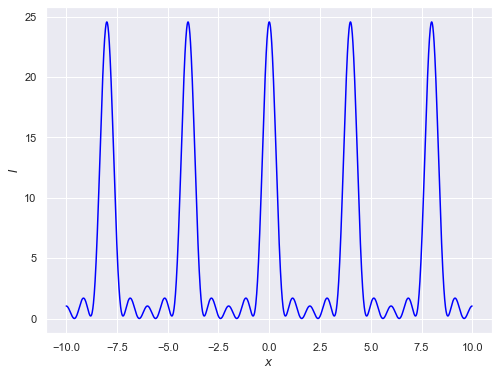

In [11]:
# グラフの各種設定
fig = plt.figure(
    figsize = (8, 6),
    facecolor = "white",
    edgecolor = "black",
)
# グラフの出力位置の設定
ax = fig.add_subplot(1, 1, 1)
# 光の強度分布をプロット
ax.plot(x_points, I_points, '-', label = 'y(t)', color = 'blue', markersize = 0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$I$')

In [12]:
# グラフの保存
import datetime
import pytz
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)

#見やすい形に変換
time = time.strftime('%m%d_nslit_1.png')
# 図の保存
fig.savefig(time, facecolor = fig.get_facecolor())

### 光の強度分布に基づいた干渉縞の描画

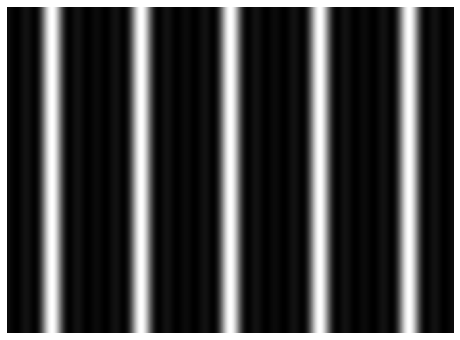

In [9]:
# 光の強度分布に基づいた干渉縞の描画
# 白：明線，黒：暗線
plt.figure(figsize=(8, 6))
splot = sns.heatmap(im_I, xticklabels=False, yticklabels=False, cbar = False, cmap = 'gist_gray')

In [10]:
sfig = splot.get_figure()
sfig.savefig('Interference fringes_nslit.png', orientation="landscape")